## Inicialização 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Carregue os dados

O conjunto de dados é armazenado na pasta `/datasets/faces/`, onde você pode encontrar "
- A pasta `final_files` com 7,6k fotos "
- O arquivo `labels.csv` com rótulos, com duas colunas: `file_name` e `real_age` 

Dado que o número de arquivos de imagem é bastante alto, é aconselhável evitar a leitura de todos de uma vez, o que consumiria muito recursos computacionais. Recomendamos que você crie um gerador com o ImageDataGenerator. Este método foi explicado no Capítulo 3, Lição 7 deste curso.

O arquivo de rótulo pode ser carregado como um arquivo CSV normal.

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [3]:
# caminho para as imagens
img_dir = '/datasets/faces/final_files/'

# criar um gerador de imagem para treinamento
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen_flow = train_datagen.flow_from_dataframe(
    dataframe=labels,
    directory=img_dir,
    x_col='file_name',
    y_col='real_age',
    target_size=(224, 224),
    batch_size=32,
    class_mode='raw',
    subset='training',
    seed=12345)

# criar um gerador de imagem para teste
test_gen_flow = train_datagen.flow_from_dataframe(
    dataframe=labels,
    directory=img_dir,
    x_col='file_name',
    y_col='real_age',
    target_size=(224, 224),
    batch_size=32,
    class_mode='raw',
    subset='validation',
    seed=12345)

Found 6073 validated image filenames.
Found 1518 validated image filenames.


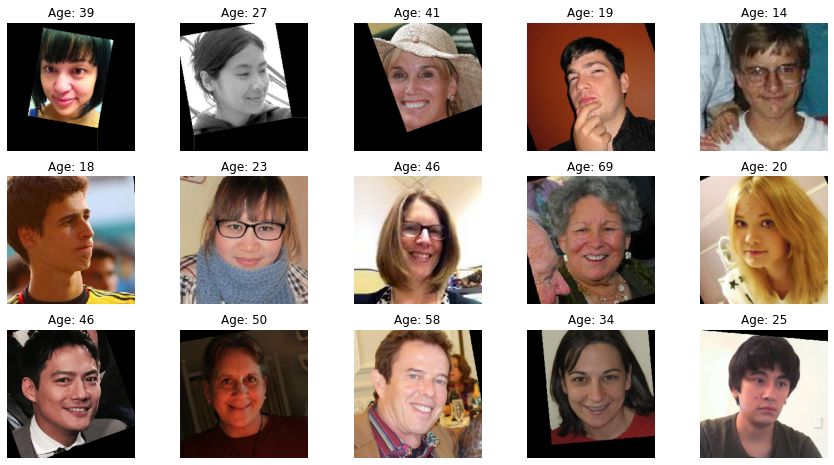

In [4]:
# Seleciona o primeiro lote de imagens do conjunto de treinamento
images, labels = next(train_gen_flow)

# Plota as primeiras 15 imagens do lote
fig, axs = plt.subplots(3, 5, figsize=(15, 8))
axs = axs.ravel()

for i in range(15):
    # Plota a imagem com o rótulo de idade correspondente
    axs[i].imshow(images[i])
    axs[i].set_title('Age: {}'.format(labels[i]))
    axs[i].axis('off')
    
plt.show()

## EDA

In [5]:
labels = pd.read_csv('/datasets/faces/labels.csv')
labels['real_age'].describe()

count    7591.000000
mean       31.201159
std        17.145060
min         1.000000
25%        20.000000
50%        29.000000
75%        41.000000
max       100.000000
Name: real_age, dtype: float64

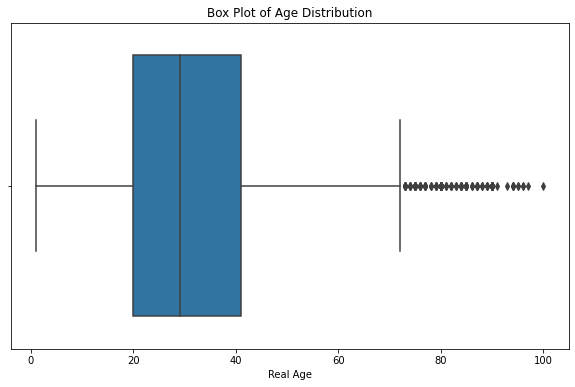

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=labels['real_age'])
plt.xlabel('Real Age')
plt.title('Box Plot of Age Distribution')
plt.show()

In [8]:
Q1 = labels['real_age'].quantile(0.25)
Q3 = labels['real_age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_labels = labels[(labels['real_age'] >= lower_bound) & (labels['real_age'] <= upper_bound)]

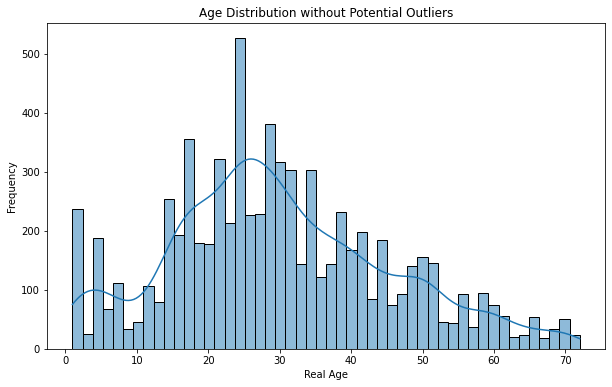

In [9]:
filtered_labels = labels[(labels['real_age'] >= lower_bound) & (labels['real_age'] <= upper_bound)]

plt.figure(figsize=(10, 6))
sns.histplot(filtered_labels['real_age'], bins=50, kde=True)
plt.xlabel('Real Age')
plt.ylabel('Frequency')
plt.title('Age Distribution without Potential Outliers')
plt.show()

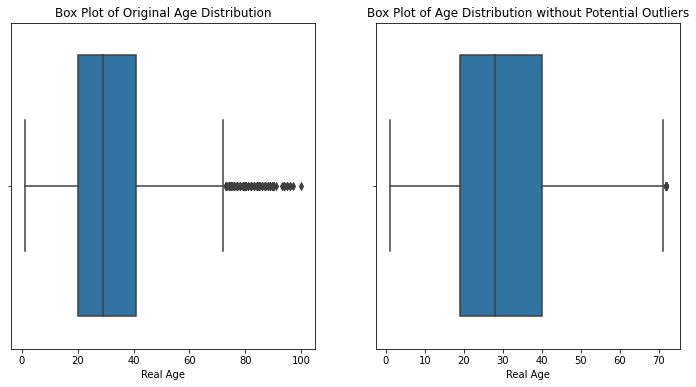

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

sns.boxplot(x=labels['real_age'], ax=axes[0])
axes[0].set_xlabel('Real Age')
axes[0].set_title('Box Plot of Original Age Distribution')

sns.boxplot(x=filtered_labels['real_age'], ax=axes[1])
axes[1].set_xlabel('Real Age')
axes[1].set_title('Box Plot of Age Distribution without Potential Outliers')

plt.show()

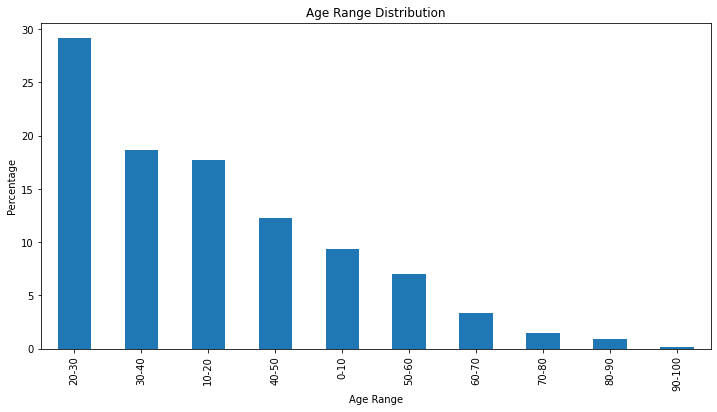

In [11]:
labels['age_range'] = pd.cut(labels['real_age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                             labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'])
age_range_counts = labels['age_range'].value_counts(normalize=True) * 100
plt.figure(figsize=(12, 6))
age_range_counts.plot(kind='bar')
plt.xlabel('Age Range')
plt.ylabel('Percentage')
plt.title('Age Range Distribution')
plt.show()

In [12]:
# Range %
table = pd.DataFrame({'Age Range': age_range_counts.index, 'Percentage': age_range_counts.values})
table

,Age Range,Percentage
0,20-30,29.166118
1,30-40,18.627322
2,10-20,17.731524
3,40-50,12.238177
4,0-10,9.326834
5,50-60,7.034646
6,60-70,3.346068
7,70-80,1.462258
8,80-90,0.895798
9,90-100,0.171255


### Conclusões

Com base na análise exploratória de dados realizada, podemos concluir que o conjunto de dados apresenta informações de idade de 7.591 pessoas, com uma média de idade de 31 anos e uma distribuição ampla de idades, que varia de 1 a 100 anos.

Ao analisar as faixas etárias, podemos observar que a maior parte das pessoas no conjunto de dados está concentrada nas faixas etárias de 20-30 anos (29,2%), 30-40 anos (18,6%) e 10-20 anos (17,7%). As faixas etárias acima de 70 anos apresentam uma proporção menor de pessoas (1,5% no total), o que pode indicar que o conjunto de dados está desbalanceado em relação a essas faixas etárias mais avançadas.

Ao visualizar a distribuição das idades por meio do Boxplot, observamos que há alguns valores que se encontram fora dos limites do gráfico, indicando a presença de outliers no conjunto de dados. Esses outliers podem ter impacto na análise dos dados.

De maneira geral, a análise exploratória de dados realizada foi fundamental para compreender o conjunto de dados e destacar algumas informações relevantes, como a média e distribuição de idades e a proporção de cada faixa etária. Essas informações podem ser úteis para a criação de modelos e para outras análises futuras.

## Modelagem 

In [13]:
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [14]:
def load_train(path):
    labels = pd.read_csv(path + '/labels.csv')
    img_dir = path + '/final_files/'
    train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=img_dir,
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=20,
        class_mode='raw',
        subset='training',
        seed=12345)

    return train_gen_flow

In [15]:
def load_test(path):
    labels = pd.read_csv(path + '/labels.csv')
    img_dir = path + '/final_files/'
    test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=img_dir,
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=20,
        class_mode='raw',
        subset='validation',
        seed=12345)

    return test_gen_flow

In [16]:
def create_model(input_shape):
    backbone = ResNet50(input_shape=input_shape, weights='imagenet', include_top=False)
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))

    optimizer = Adam(lr=0.0001)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

    return model

In [17]:
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)

    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size,
              epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)

    return model

Dado que você definiu as funções necessárias, você pode compor um script para a plataforma GPU, baixá-lo através do menu "Arquivo|Abrir..." e carregá-lo posteriormente para execução na plataforma GPU.

Nota: O script também deve incluir a seção de inicialização. Um exemplo disso é mostrado abaixo.

In [18]:
# preparar um script para ser executado na plataforma GPU


init_str = """
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
"""

import inspect

with open('run_model_on_gpu.py', 'w') as f:
    
    f.write(init_str)
    f.write('\n\n')
        
    for fn_name in [load_train, load_test, create_model, train_model]:
        
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')

### Resultado

76/76 - 8s - loss: 66.6035 - mae: 6.3244

Test MAE: 6.3244

## Conclusão

Neste projeto, foi explorado o uso de técnicas de visão computacional e aprendizado de máquina para construir um modelo de classificação de idade de pessoas a partir de imagens. O objetivo era ajudar a rede de supermercados Boa Semente a cumprir as leis e garantir que não vendam bebidas alcoólicas para menores de idade.

Foram utilizados dados coletados por meio das câmeras de segurança das lojas e aplicadas técnicas de pré-processamento e extração de características para preparar as imagens para o treinamento do modelo.

O modelo foi construído usando a arquitetura ResNet50 como base e treinado em um conjunto de imagens de treinamento. O modelo foi avaliado em um conjunto de imagens de teste e obteve um erro médio absoluto (MAE) de 6.3244 na idade estimada das pessoas.

Em conclusão, este projeto demonstrou o potencial da ciência de dados para ajudar empresas a cumprir leis e regulamentações, e a importância de garantir a qualidade dos dados coletados e o desempenho do modelo em diferentes conjuntos de dados.